In [1]:
import pandas as pd

In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.data.tackler_info import (
    simplify_tackles_df, player_dist_to_ball_carrier, tackler_distance, dist_group
)

In [3]:
games_df = pd.read_csv('../data/raw/games.csv')
plays_df = pd.read_csv('../data/raw/plays.csv')
players_df = pd.read_csv('../data/raw/players.csv')
tackles_df = pd.read_csv('../data/raw/tackles.csv')
tracking_week_1_df = pd.read_csv('../data/raw/tracking_week_1.csv')

In [8]:
tackle_simple_df = simplify_tackles_df(tackles_df)
ball_carrier_dist_df = player_dist_to_ball_carrier(plays_df, tracking_week_1_df)
df = tackler_distance(tackle_simple_df, ball_carrier_dist_df)

In [9]:
df['dist_group'] = df.apply(dist_group, axis=1)
df.query("club != club_ball_carrier").groupby(
    ['event', 'dist_group']
    ).size().unstack('dist_group')

dist_group,0 - 0.5,0.5 - 1,1 - 2,>2
event,,,,
None,617.0,963.0,1565.0,11007.0
assist,381.0,186.0,18.0,4.0
forcedFumble,15.0,9.0,1.0,NaN
pff_missedTackle,68.0,147.0,34.0,7.0
tackle,741.0,402.0,64.0,7.0


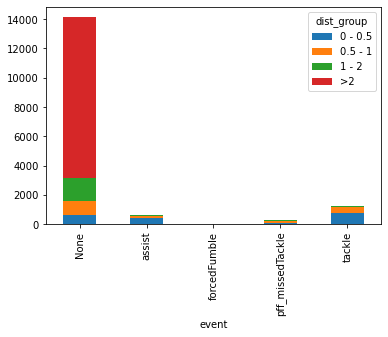

In [10]:
df.query("club != club_ball_carrier").groupby(
    ['event', 'dist_group']
    ).size().unstack('dist_group').plot(kind='bar', stacked=True)

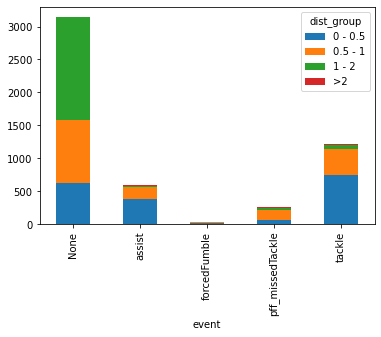

In [11]:
df.query("club != club_ball_carrier and not (event == 'None' and dist_group == '>2')").groupby(
    ['event', 'dist_group']
    ).size().unstack('dist_group').plot(kind='bar', stacked=True)

In [25]:
tackle_dist_df = pd.read_csv('../data/interim/min_dist_tackle.csv', index_col = 0)

In [28]:
tackle_dist_df['event'].value_counts()

None                257206
tackle                9919
assist                5488
pff_missedTackle      2090
forcedFumble            99
Name: event, dtype: int64

In [29]:
tackle_dist_df.query("club != club_ball_carrier and not (event == 'None' and dist_group == '>2')").groupby(
    ['event', 'dist_group']
    ).size().unstack('dist_group').plot(kind='bar', stacked=True)

UndefinedVariableError: name 'dist_group' is not defined

few good men
thema and louise
armegeddon
rudy